# Human-wildlife coexistence incidents managed by Parks Canada

Find all dataset in [here](https://open.canada.ca/data/en/dataset/743a0b4a-9e33-4b12-981a-9f9fd3dd1680).

This Open Data Record is comprised of datasets that document human-wildlife coexistence incidents and response actions by Parks Canada Agency. A human-wildlife coexistence (HWC) “incident” is any potential conflict situation between people and wildlife that was assigned to Parks Canada staff to manage to help ensure the safety and wellbeing of people and wildlife. The vast majority of HWC incidents are minor and staff are able to manage them safely with low risk to people, however, the dataset also includes more hazardous incidents between people and wildlife that can result in injury or death of either wildlife or people.

HWC incident data inform Parks Canada Agency policies, programs, and operations, and enable evaluation of HWC patterns to help Parks Canada ensure safe and enjoyable visitor experiences while conserving wildlife and integrity of ecosystems across our national system of protected heritage areas.

For any single HWC incident, there may be multiple management actions taken or multiple animals involved, and therefore this Open Data Record includes separate datasets for **incidents**, **responses**, **animals involved**, and **human activities**. These four datasets include many shared fields, including a unique alphanumeric “Incident Number” that can be used to look-up records between the tables or to join the tables in a relational database. There are also thirteen derived datasets provided to summarize the total number of incidents, animal species involved, animals killed (by human causes), aggressive encounters, unnatural attractants, and response actions taken. Please note: these datasets include some incidents that Parks Canada staff were involved outside of park boundaries on surrounding lands or waters.

All HWC incident data remain subject to ongoing revisions as more information comes available or for quality control purposes. All protected, personal, private or confidential information has been removed from these datasets.

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
incidents = pd.read_csv("../Human-wildlife coexistence incidents managed by Parks Canada Dataset"+
                              "/pca-human-wildlife-coexistence-incidents-detailed-records.csv",
                        encoding= 'unicode_escape', parse_dates = ["Incident Date"])
responses = pd.read_csv("../Human-wildlife coexistence incidents managed by Parks Canada Dataset"+
                              "/pca-human-wildlife-coexistence-responses-detailed-records.csv",
                        encoding= 'unicode_escape', parse_dates = ["Incident Date"])
animals_involved = pd.read_csv("../Human-wildlife coexistence incidents managed by Parks Canada Dataset"+
                              "/pca-human-wildlife-coexistence-animals-involved-detailed-records.csv",
                               encoding= 'unicode_escape', parse_dates = ["Incident Date"])
activities = pd.read_csv("../Human-wildlife coexistence incidents managed by Parks Canada Dataset"+
                              "/pca-human-wildlife-coexistence-activities-detailed-records.csv", 
                         encoding= 'unicode_escape', parse_dates = ["Incident Date"])
data_dictionary = pd.read_csv("../Human-wildlife coexistence incidents managed by Parks Canada Dataset"+
                              "/pca_national_human_wildlife_conflict_data_dictionary.csv")
heading = pd.read_csv("../Human-wildlife coexistence incidents managed by Parks Canada Dataset"+
                              "/pca-national-human-wildlife-coexistence-heading-descriptions.csv",
                      encoding= 'unicode_escape').iloc[:,[0,2]]
#parse Local Time as time
incidents['Local Time'] = pd.to_datetime(incidents['Local Time']).apply(lambda x: x.strftime(r'%H:%M:%S'))
responses['Local Time'] = pd.to_datetime(responses['Local Time']).apply(lambda x: x.strftime(r'%H:%M:%S'))
animals_involved['Local Time'] = pd.to_datetime(animals_involved['Local Time']).apply(lambda x: x.strftime(r'%H:%M:%S'))
activities['Local Time'] = pd.to_datetime(activities['Local Time']).apply(lambda x: x.strftime(r'%H:%M:%S'))

In [3]:
#Display the first few rows of each dataset
display(incidents.head(4))
display(responses.head(4))
display(animals_involved.head(4))
display(activities.head(4))
display(data_dictionary.head(4))
display(heading.head(4))

,Incident Number,Incident Date,Local Time,Field Unit,Protected Heritage Area,Latitude Public,Longitude Public,Within Park,Incident Type,Sum of Total Staff Involved,Sum of Total Staff Hours
0,2021-HWC-0000-JASFU-2861,2021-12-31,09:34:37,Jasper Field Unit,Jasper National Park of Canada,52.876739,-118.091588,Yes,Human Wildlife Interaction,1,0.67
1,2021-HWC-0000-JASFU-2862,2021-12-31,11:37:20,Jasper Field Unit,Jasper National Park of Canada,53.093617,-118.030592,Yes,Rescued/Recovered/Found Wildlife,1,2.00
2,2021-HWC-0574-JASFU-0016,2021-12-31,08:40:06,Jasper Field Unit,Jasper National Park of Canada,52.860896,-118.087098,Yes,Human Wildlife Interaction,1,0.17
3,2021-HWC-1114-YKLLFU-0033,2021-12-31,11:29:22,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,51.380551,-116.147884,Yes,Attractant,1,1.75


,Incident Number,Incident Date,Local Time,Field Unit,Protected Heritage Area,Response Type
0,2017-HWC-0005-YKLLFU-0001,2017-08-01,18:14:16,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Haze - Soft
1,2017-HWC-0005-YKLLFU-0002,2017-09-07,18:55:21,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Investigate Incident
2,2017-HWC-0005-YKLLFU-0002,2017-09-07,18:55:21,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Monitor - visitor and staff sighting
3,2017-HWC-0005-YKLLFU-0003,2017-07-08,12:38:02,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Haze - Soft


,Incident Number,Incident Date,Local Time,Field Unit,Protected Heritage Area,Incident Type,Species Common Name,Sum of Number of Animals,Animal Health Status,Cause of Animal Health Status,Animal Behaviour,Reason for Animal Behaviour,Animal Attractant,Deterrents Used,Animal Response to Deterrents
0,2017-HWC-0005-YKLLFU-0001,2017-08-01,18:14:16,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Human Wildlife Interaction,Black Bear,1,Healthy,NaN,NaN,NaN,NaN,Non-impact - Chalkball,Retreat - Run
1,2017-HWC-0005-YKLLFU-0002,2017-09-07,18:55:21,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Human Wildlife Interaction,Grizzly Bear,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-HWC-0005-YKLLFU-0003,2017-07-08,12:38:02,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Human Wildlife Interaction,Black Bear,1,Healthy,NaN,NaN,NaN,NaN,Noise - Voice,Retreat - Run
3,2017-HWC-0005-YKLLFU-0004,2017-06-23,11:11:06,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Human Wildlife Interaction,Grizzly Bear,2,Healthy,NaN,Indifferent to People/Vehicles,NaN,NaN,None,NaN


,Incident Number,Incident Date,Local Time,Field Unit,Protected Heritage Area,Activity Type
0,2017-HWC-0005-YKLLFU-0001,2017-08-01,18:14:16,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Driving
1,2017-HWC-0005-YKLLFU-0002,2017-09-07,18:55:21,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Camping - Backcountry
2,2017-HWC-0005-YKLLFU-0003,2017-07-08,12:38:02,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Driving
3,2017-HWC-0005-YKLLFU-0004,2017-06-23,11:11:06,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Driving


,Data_Field,Champ_de_la_donnée,Data_Value,Valeur_de_la_donnée,Value_Description,Description_de_la_valeur
0,Activity Type,Type d'activité,Backpacking – Multiday Trips,Randonnée pédestre – excursion de plusieurs jours,Backpacking – Multiday Trips,Randonnée pédestre – excursion de plusieurs jours
1,Activity Type,Type d'activité,Beach Recreation,Activitée de plage,Beach Recreation,Activitée de plage
2,Activity Type,Type d'activité,Boating - Coastal/Marine,Navigation - côtière/marin,Boating - Coastal/Marine,Navigation - côtière/marin
3,Activity Type,Type d'activité,Boating - Commercial,Navigation - Commerciale,Boating - Commercial,Navigation - Commerciale


,Revised Column Header EN,Value Description EN
0,Incident Date,Incident Date
1,Local Time,Local Time
2,Year,Year
3,Month,Month


In [4]:
#A summary of each dataset.
incidents.info()
print()
responses.info()
print()
animals_involved.info()
print()
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36525 entries, 0 to 36524
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Incident Number              36525 non-null  object        
 1   Incident Date                36525 non-null  datetime64[ns]
 2   Local Time                   36525 non-null  object        
 3   Field Unit                   36525 non-null  object        
 4   Protected Heritage Area      36525 non-null  object        
 5   Latitude Public              36516 non-null  float64       
 6   Longitude Public             36516 non-null  float64       
 7   Within Park                  36487 non-null  object        
 8   Incident Type                36525 non-null  object        
 9   Sum of Total Staff Involved  36525 non-null  int64         
 10  Sum of Total Staff Hours     36525 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1

# Some questions come up.

1. What kind of incidents require the most of staff hours on average?
2. What is the most frequent incident occurred?
3. Which area has the most chance to have an incident?
4. What species are having more incidents with human?
5. What activity is more likely to have incidents with wild animals?
6. How many Staff Involved are required on average for each indicents?
7. Is there any season pattern for human and wide animals incidents?
8. What species are more likely to shown in a group?
9. What Deterrents are effective to expel wide animals?
10. Can we predict the number of staff required for different incidents?
11. Is there any groups of wide animals share the similar characteristics?
12. Is Incident Type independent from Activity Type or not?

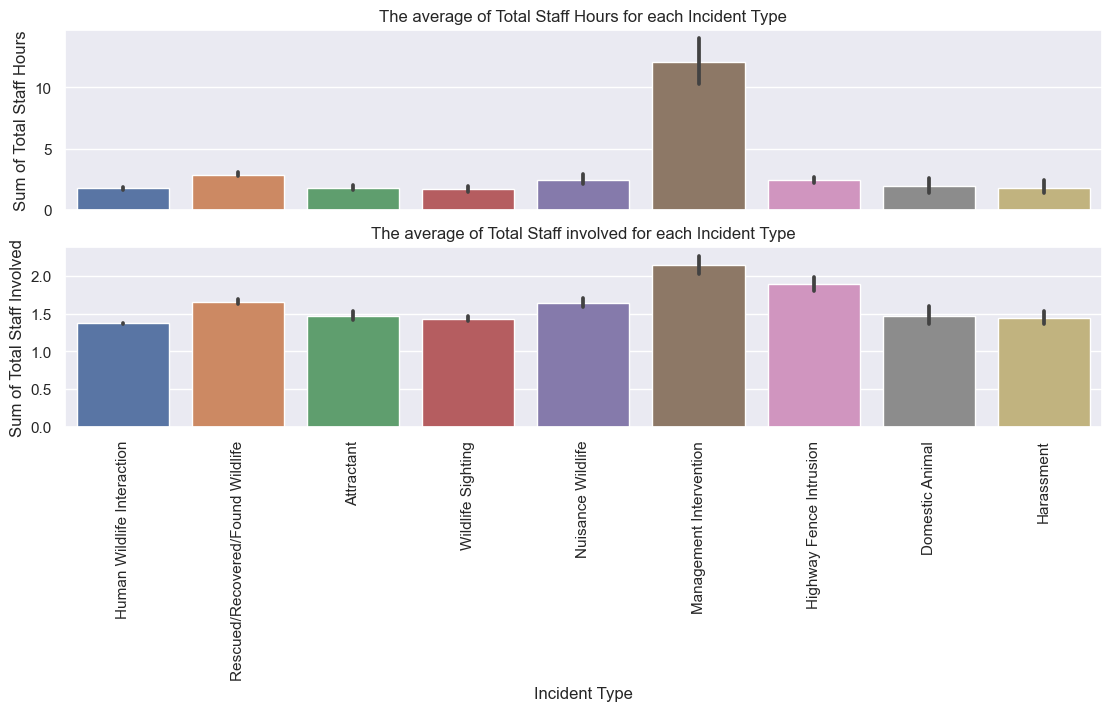

In [194]:
# Q1: What kind of incidents require the most of staff hours on average?
fig, axs = plt.subplots(nrows=2,layout = 'constrained', figsize = (11, 7), sharex = True)
sns.barplot(data = incidents, x = "Incident Type", y = "Sum of Total Staff Hours", 
            ax = axs[0]).set(title = 'The average of Total Staff Hours for each Incident Type')
#Q6: How many Staff Involved / Staff hours are required on average for each indicents?
sns.barplot(data = incidents, x = "Incident Type", y = "Sum of Total Staff Involved", 
            ax = axs[1]).set(title = 'The average of Total Staff involved for each Incident Type')
axs[0].set(xlabel = None)
axs[1].tick_params(axis='x', labelrotation=90)
plt.show()

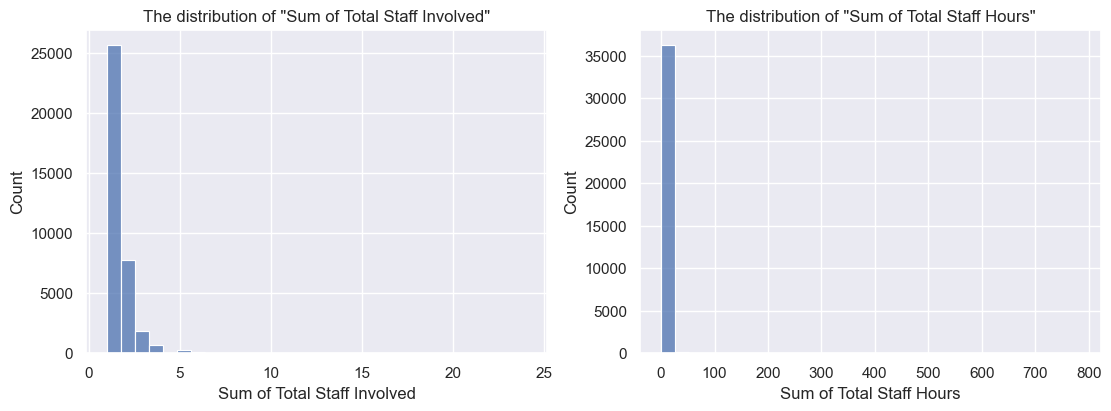

In [121]:
# Q2: What is the most frequent incident occurred?
#Q2.1: what is the distribution of Sum of Total Staff Hours and Sum of Total Staff Involved
fig, axs = plt.subplots(nrows=1,ncols = 2, layout = 'constrained', figsize = (11, 4))
sns.histplot(data = incidents, x = "Sum of Total Staff Involved", bins=30, ax = axs[0]).\
set(title = 'The distribution of "Sum of Total Staff Involved"')
sns.histplot(data = incidents, x = "Sum of Total Staff Hours", bins=30, ax = axs[1]).\
set(title = 'The distribution of "Sum of Total Staff Hours"')
plt.show()

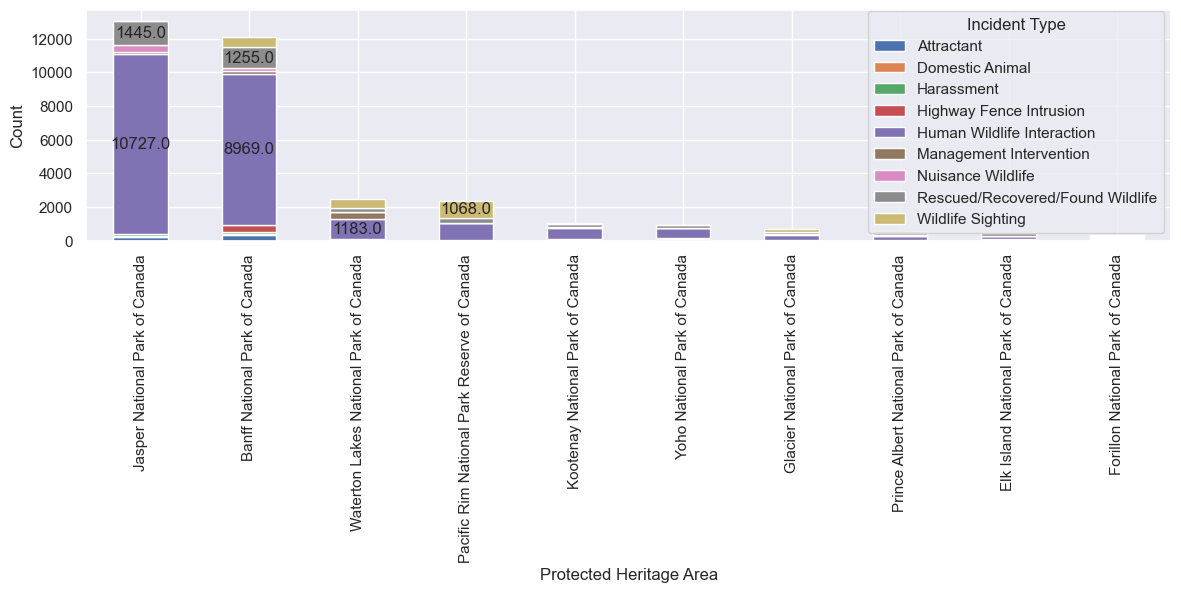

In [174]:
#Q2.2: What is the most frequent incident occurred?
#Q3: Which area has the most chance to have an incident?
incidents_grouped = incidents.groupby(['Protected Heritage Area', 'Incident Type']).size().unstack().fillna(0)
incidents_grouped['Total'] = incidents_grouped.sum(axis = 1)
# I will only look at the top 20 parks based on the number of incidents
incidents_grouped = incidents_grouped.sort_values(by=['Total'], ascending=False).drop(columns = ['Total']).head(10)
ax = incidents_grouped.plot(kind= 'bar', stacked = True,figsize=(14,3), ylabel = "Count")
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 1000 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

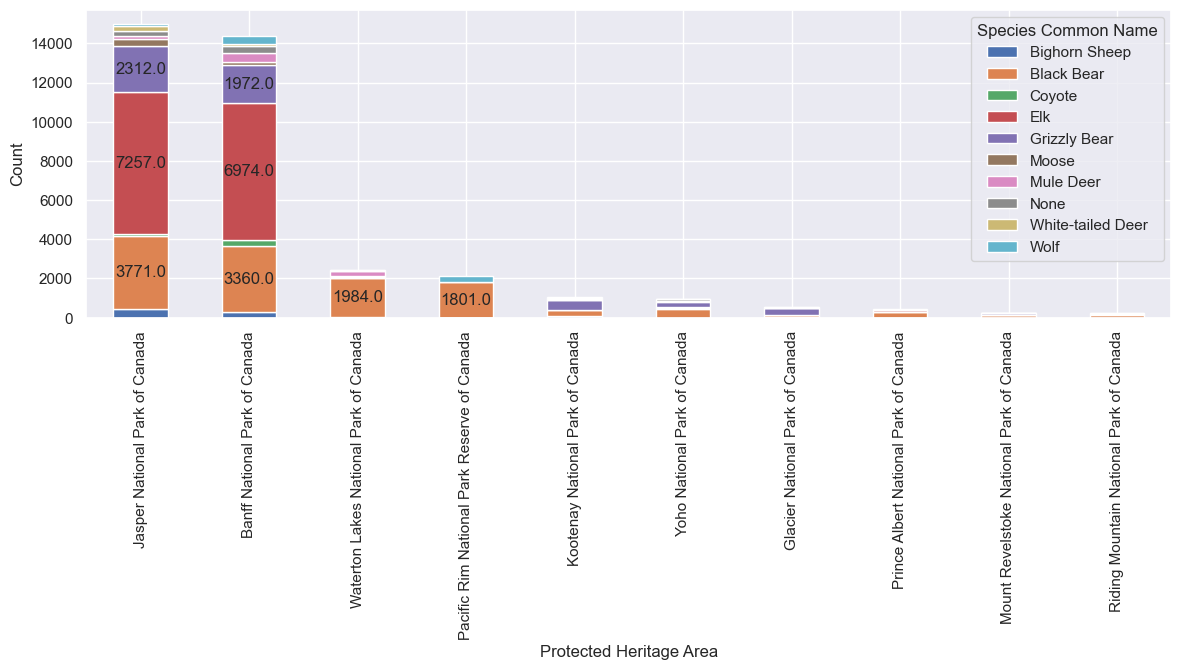

In [172]:
#Q4: What species are having more incidents with human?
#Because there are too many species, I will only pick the top 10 species 
top10_species = animals_involved.groupby(['Species Common Name']).size().to_frame("size").\
    reset_index().sort_values(by = ['size'], ascending = False).head(10)
animals_involved_grouped = animals_involved.groupby(['Protected Heritage Area', 
                                                     'Species Common Name']).size().unstack().fillna(0)
animals_involved_grouped = animals_involved_grouped.loc[:, 
                                    animals_involved_grouped.columns.isin(top10_species['Species Common Name'])]
animals_involved_grouped['Total'] = animals_involved_grouped.sum(axis = 1)
# I will only look at the top 20 parks based on the number of incidents
animals_involved_grouped = animals_involved_grouped.sort_values(by=['Total'], 
                                                                ascending=False).drop(columns = ['Total']).head(10)
ax = animals_involved_grouped.plot(kind= 'bar', stacked = True,figsize=(14,4), ylabel = "Count")
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 1000 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

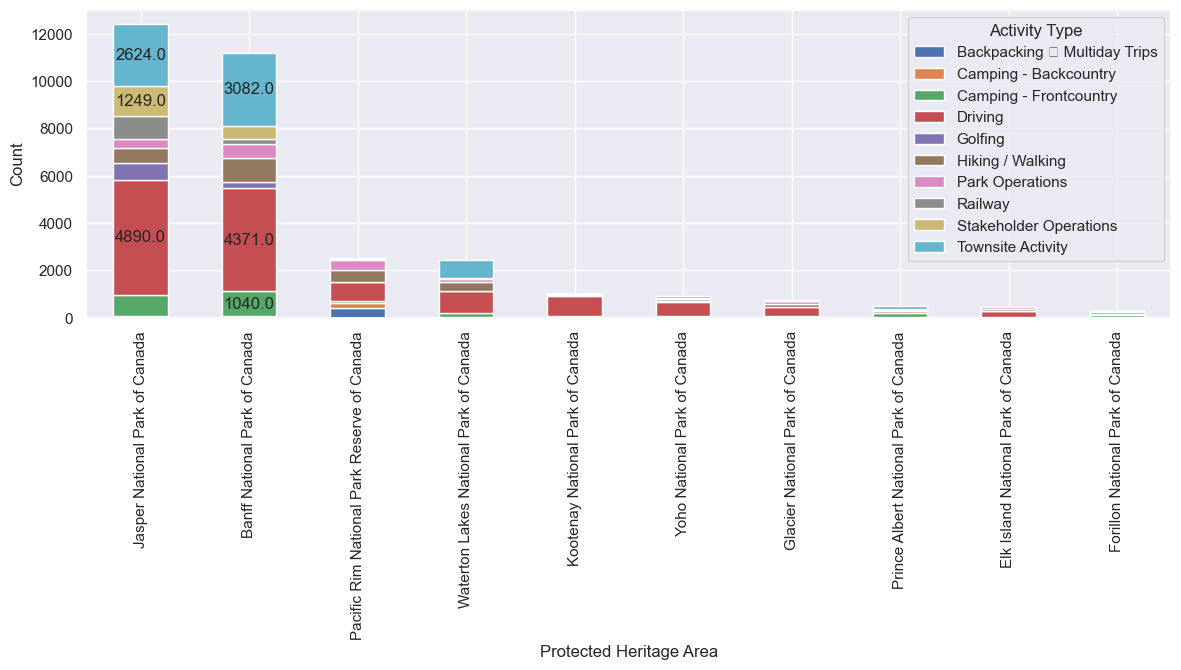

In [171]:
#Q5: What activity is more likely to have incidents with wild animals?
top10_activity = activities.groupby(['Activity Type']).size().to_frame("size").\
    reset_index().sort_values(by = ['size'], ascending = False).head(10)
activities_grouped = activities.groupby(['Protected Heritage Area', 
                                                     'Activity Type']).size().unstack().fillna(0)
activities_grouped = activities_grouped.loc[:, 
                                    activities_grouped.columns.isin(top10_activity['Activity Type'])]
activities_grouped['Total'] = activities_grouped.sum(axis = 1)
# I will only look at the top 20 parks based on the number of incidents
activities_grouped = activities_grouped.sort_values(by=['Total'], 
                                                                ascending=False).drop(columns = ['Total']).head(10)
ax = activities_grouped.plot(kind= 'bar', stacked = True,figsize=(14,4), ylabel = "Count")
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 1000 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

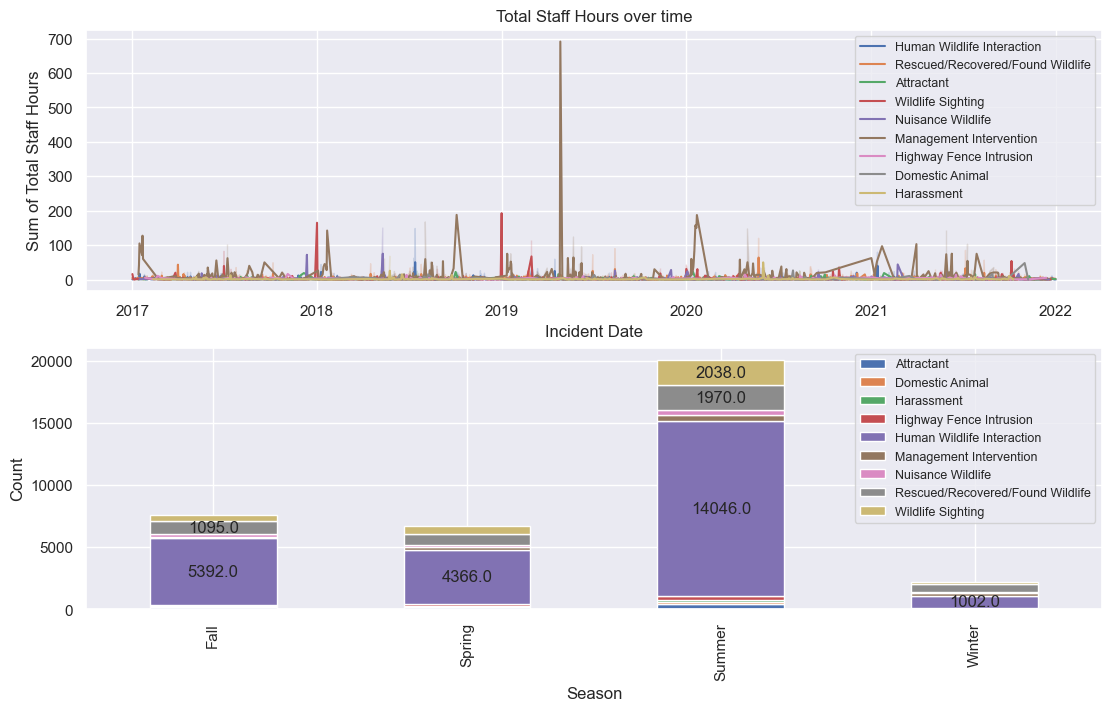

In [226]:
# Q7: Is there any season pattern for human and wide animals incidents?
#Q7.1: What does the total staff hours change over time
fig, axs = plt.subplots(nrows=2,layout = 'constrained', figsize = (11, 7))
sns.lineplot(data = incidents, x = "Incident Date", y = "Sum of Total Staff Hours", 
             hue = 'Incident Type', ax = axs[0]).set(title = 'Total Staff Hours over time')
#Add additional column to get the season of a date using the following map
season = {1: "Winter", 2 : "Spring", 3:"Summer", 4:"Fall"}
incidents['Season'] = (incidents['Incident Date'].dt.month %12 //3 + 1).map(season)
incidents_season_grouped = incidents.groupby(['Season', 'Incident Type']).size().unstack()
ax = incidents_season_grouped.plot(kind= 'bar', stacked = True,ax = axs[1], ylabel = "Count")
axs[0].legend(fontsize=9)
axs[1].legend(fontsize=9)
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 1000 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

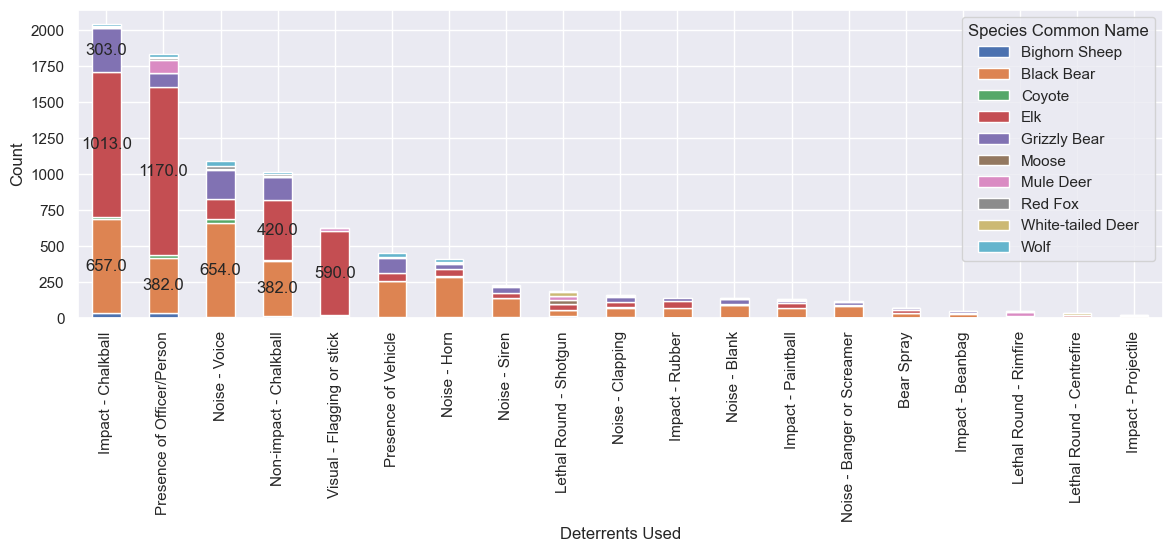

In [337]:
#Q9: What Deterrents are effective to expel different wide animals?
animals_involved_Deterrents = animals_involved[['Species Common Name', 'Deterrents Used']]\
                        .dropna(subset= ['Deterrents Used'])
animals_involved_Deterrents = animals_involved_Deterrents.loc[~animals_involved_Deterrents['Deterrents Used'].\
                                                              isin(['Not Applicable', 'None', 'Unknown', 'Other'])]
#Because there are some species only have shown up a few times, we will only keep top 10 species 
# top10_species = animals_involved_Deterrents['Species Common Name'].value_counts().head(10).index.to_list()
top10_species_list = animals_involved_Deterrents.groupby(['Species Common Name']).size().to_frame("size").\
    reset_index().sort_values(by = ['size'], ascending = False).head(10)
animals_involved_Deterrents_top = animals_involved_Deterrents.groupby(['Deterrents Used', 'Species Common Name'])\
                            .size().unstack().fillna(0)
animals_involved_Deterrents_top = animals_involved_Deterrents_top.loc[:, 
                                    animals_involved_Deterrents_top.columns.isin(top10_species_list['Species Common Name'])]
#Reorder the Deterrents Used based on their total count 
animals_involved_Deterrents_top['Total'] = animals_involved_Deterrents_top.sum(axis = 1)
animals_involved_Deterrents_top = animals_involved_Deterrents_top.sort_values(by=['Total'], 
                                                                ascending=False).drop(columns = ['Total'])

ax = animals_involved_Deterrents_top.plot(kind= 'bar', stacked = True,figsize=(14,4), ylabel = "Count")
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 300 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')